### Objective of the Project                                                

#### This project takes raw Air Quality data from four csv files from Taiwan and Madrid in years 2014 and 2015.
#### The Information it provides is a comparison of Air Quality between the two cities and the comparison of Air Quality in same city in different years.


In [44]:
# import required libraries
from pandas import DataFrame, read_csv
import pandas as pd 

#### Reading the data fro, CSVs to Dataframes

In [45]:
taiwan2014 = pd.read_csv('/Users/sdamaraju/PycharmProjects/IntroToDS-731/Jimmy Wrangler - Project1/data/raw/aqi_tw_2014.csv')
taiwan2015 = pd.read_csv('/Users/sdamaraju/PycharmProjects/IntroToDS-731/Jimmy Wrangler - Project1/data/raw/aqi_tw_2015.csv')
madrid2014 = pd.read_csv('/Users/sdamaraju/PycharmProjects/IntroToDS-731/Jimmy Wrangler - Project1/data/raw/madrid_2014.csv')
madrid2015 = pd.read_csv('/Users/sdamaraju/PycharmProjects/IntroToDS-731/Jimmy Wrangler - Project1/data/raw/madrid_2015.csv')

### Meta data formatting and Data processing

In [46]:
# Data Processing 

# Step1 : Selecting only required columns from raw data and renaming columns to keep the dataframes in sync. 
# Not including date columns, because it has different formats. Will be appending Year, in later steps.
taiwan2014Processed = taiwan2014[['SO2','CO','O3','NO','NO2','PM10','PM25']]
taiwan2015Processed = taiwan2015[['SO2','CO','O3','NO','NO2','PM10','PM25']]
madrid2014Processed = madrid2014[['SO_2','CO','O_3','NO','NO_2','PM10','PM25']]
madrid2014Processed = madrid2014Processed.rename(columns={'SO_2': 'SO2', 'NO_2': 'NO2', 'O_3':'O3'})
madrid2015Processed = madrid2015[['SO_2','CO','O_3','NO','NO_2','PM10','PM25']]
madrid2015Processed = madrid2015Processed.rename(columns={'SO_2': 'SO2', 'NO_2': 'NO2', 'O_3':'O3'})

# Step2: Dropping rows that have NAN values and truncating all data sets to least possible size among all the datasets to keep the datasets of sime size.
# 65536 is max limit of rows for excel eport, so using a max of 65536 rows or lesser.

minLength = 65536
taiwan2014Processed = taiwan2014Processed.dropna(how='any')
length1 = len(taiwan2014Processed)
if length1 < minLength :
    minLength = length1
taiwan2015Processed = taiwan2015Processed.dropna(how='any')

length1 = len(taiwan2015Processed)
if length1 < minLength :
    minLength = length1
madrid2014Processed = madrid2014Processed.dropna(how='any')

length1 = len(madrid2014Processed)
if length1 < minLength :
    minLength = length1
madrid2015Processed = madrid2015Processed.dropna(how='any')

length1 = len(madrid2015Processed)
if length1 < minLength :
    minLength = length1

taiwan2014Processed = taiwan2014Processed[0:minLength]
taiwan2015Processed = taiwan2015Processed[0:minLength]
madrid2014Processed = madrid2014Processed[0:minLength]
madrid2015Processed = madrid2015Processed[0:minLength]

#Step 3: Adding required columns to the dataframes.
taiwan2014Processed['Year'],taiwan2014Processed['City'] = [2014,'Taiwan']
taiwan2015Processed['Year'],taiwan2015Processed['City'] = [2015,'Taiwan']
madrid2014Processed['Year'],madrid2014Processed['City'] = [2014,'Madrid']
madrid2015Processed['Year'],madrid2015Processed['City'] = [2015,'Madrid']


# Dataframes ready to be used.

#### Exporting processed data to folder structure

In [47]:
#Storing the processed data to processed folder.
taiwan2014Processed.to_excel('/Users/sdamaraju/PycharmProjects/IntroToDS-731/Jimmy Wrangler - Project1/data/processed/taiwan2014Processed.xls', sheet_name='Sheet1')
taiwan2015Processed.to_excel('/Users/sdamaraju/PycharmProjects/IntroToDS-731/Jimmy Wrangler - Project1/data/processed/taiwan2015Processed.xls', sheet_name='Sheet1')
madrid2014Processed.to_excel('/Users/sdamaraju/PycharmProjects/IntroToDS-731/Jimmy Wrangler - Project1/data/processed/madrid2014Processed.xls', sheet_name='Sheet1')
madrid2015Processed.to_excel('/Users/sdamaraju/PycharmProjects/IntroToDS-731/Jimmy Wrangler - Project1/data/processed/madrid2015Processed.xls', sheet_name='Sheet1')


### Data Exploration..

##### Here we are concatenating all the data frames into one data frame and then applying filters and group bys accordingly based on the requirement.
##### We are using mean to get the average values 

In [48]:
# Exploring the data..

#Step 1: Concatenate all the data frames into 1.
frames = [taiwan2014Processed,taiwan2015Processed,madrid2014Processed,madrid2015Processed]
AllDataTogether = pd.concat(frames)

#Start grouping.. and acquire the information from the data.

#Step 2: Comparing Taiwan in 2015 against 2014
Taiwan2014vs2015 = AllDataTogether[AllDataTogether['City'] == 'Taiwan'].groupby(['Year']).mean()

#Step 3: Comparing Madrid in 2015 against 2014
Madrid2014vs2015 = AllDataTogether[AllDataTogether['City'] == 'Madrid'].groupby(['Year']).mean()

#Step 4: Comparing Taiwan and Madrid in 2014
TaiwanVsMadrid2014 = AllDataTogether[AllDataTogether['Year'] == 2014].drop(['Year'],axis=1)
TaiwanVsMadrid2014 = TaiwanVsMadrid2014.groupby(['City']).mean()

#Step 5: Comparing Taiwan  and Madrid in 2015
TaiwanVsMadrid2015 = AllDataTogether[AllDataTogether['Year'] == 2015].drop(['Year'],axis=1)
TaiwanVsMadrid2015 = TaiwanVsMadrid2015.groupby(['City']).mean()

### Plotting the results

Text(0.5, 1.0, 'Air Quality in 2015 - Taiwan vs Madrid')

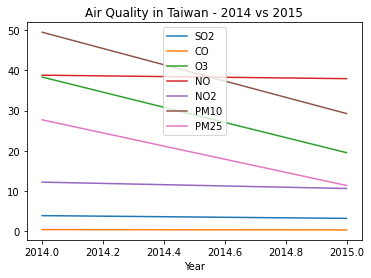

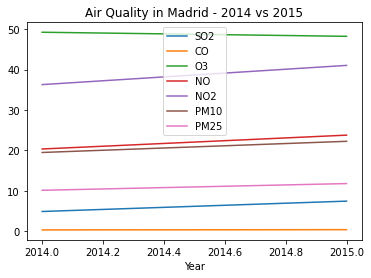

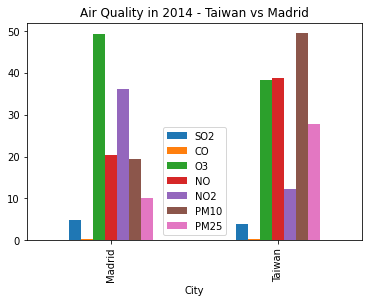

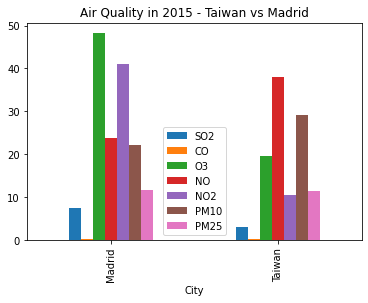

In [49]:
#Plotting the results.
import matplotlib.pyplot as plt

Taiwan2014vs2015.plot()
plt.title("Air Quality in Taiwan - 2014 vs 2015")
Madrid2014vs2015.plot()
plt.title("Air Quality in Madrid - 2014 vs 2015")
TaiwanVsMadrid2014.plot(kind='bar')
plt.title("Air Quality in 2014 - Taiwan vs Madrid")
TaiwanVsMadrid2015.plot(kind='bar')
plt.title("Air Quality in 2015 - Taiwan vs Madrid")

### Exporting results to the reports folder.

In [50]:
#Export results to reports folder.
Taiwan2014vs2015.to_csv('/Users/sdamaraju/PycharmProjects/IntroToDS-731/Jimmy Wrangler - Project1/reports/Taiwan2014vs2015.csv')
Madrid2014vs2015.to_csv('/Users/sdamaraju/PycharmProjects/IntroToDS-731/Jimmy Wrangler - Project1/reports/Madrid2014vs2015.csv')
TaiwanVsMadrid2014.to_csv('/Users/sdamaraju/PycharmProjects/IntroToDS-731/Jimmy Wrangler - Project1/reports/TaiwanVsMadrid2014.csv')
TaiwanVsMadrid2015.to_csv('/Users/sdamaraju/PycharmProjects/IntroToDS-731/Jimmy Wrangler - Project1/reports/TaiwanVsMadrid2015.csv')